In [1]:
from ultralytics import YOLO
import cv2
from PIL import Image
from util import read_license_plate
import re

Using CPU. Note: This module is much faster with a GPU.


In [ ]:
import easyocr
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Vinayak\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Checking connectivity to the model hosters, this may take a while. To bypass this check, set `DISABLE_MODEL_SOURCE_CHECK` to `True`.


In [3]:
model = YOLO("best.pt")  
DEVICE = 0 
reader = easyocr.Reader(['en'])

In [4]:
image_path = "download_2.jpg"

In [5]:
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [6]:
results = model.predict(image_rgb, conf=0.6, device=DEVICE, verbose=False)

Object 1 text:
HH12 DE1433



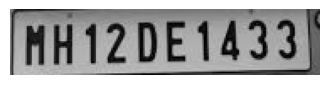

In [7]:
for i, box in enumerate(results[0].boxes.xyxy):
    x1, y1, x2, y2 = map(int, box)
    
    # Crop detected object
    cropped = image[y1:y2, x1:x2]  # OpenCV BGR format

    # Convert BGR → RGB for displaying
    cropped_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)

    # Run OCR (EasyOCR expects NumPy array)
    text_result = reader.readtext(cropped_rgb)

    # Extract and print only the text
    detected_text = " | ".join([t[1] for t in text_result])
    print(f"Object {i+1} text:\n{detected_text}\n")

    # Display cropped object inline
    plt.figure(figsize=(4,4))
    plt.imshow(cropped_rgb)
    plt.axis('off')
    plt.show()

In [8]:
# annotated = results[0].plot()
# plt.figure(figsize=(8,8))
# plt.imshow(annotated)
# plt.axis('off')
# plt.show()

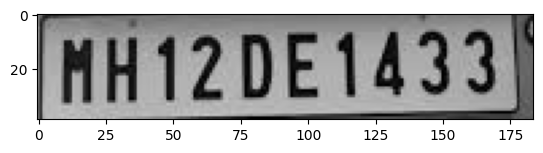

In [9]:
plt.imshow(cropped_rgb)

In [10]:
img =cropped_rgb

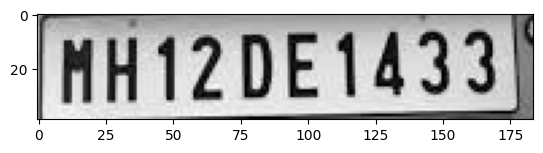

In [11]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
plt.imshow(gray)

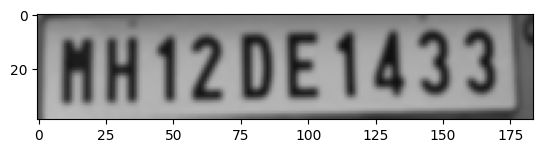

In [12]:
gray_gau = cv2.GaussianBlur(img, (5,5), 0)
plt.imshow(gray_gau)

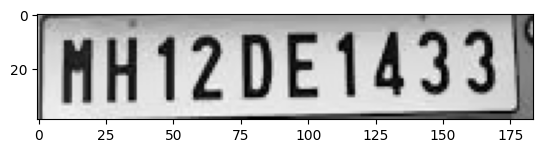

In [13]:
gray_bi = cv2.bilateralFilter(gray, 11, 17, 17)
plt.imshow(gray_bi)

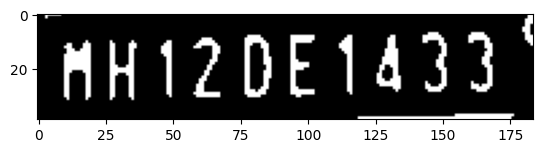

In [14]:
_, thresh_gau = cv2.threshold(gray_gau, 64, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh_gau)

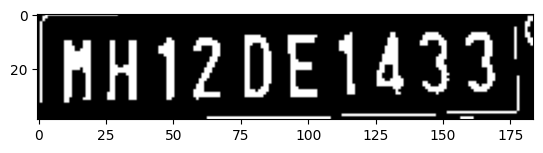

In [15]:
_, thresh_bi = cv2.threshold(gray_bi, 64, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh_bi)

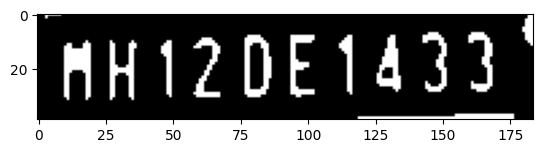

In [16]:
kernel = np.ones((3,3), np.uint8)
thresh_gau = cv2.morphologyEx(thresh_gau, cv2.MORPH_CLOSE, kernel)
plt.imshow(thresh_gau)

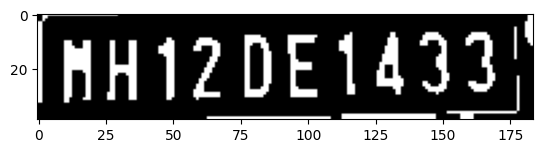

In [17]:
thresh_bi = cv2.morphologyEx(thresh_bi, cv2.MORPH_CLOSE, kernel)
plt.imshow(thresh_bi)

In [18]:
detections = reader.readtext(thresh_bi)
detections

[([[0, 0], [np.int32(181), 0], [np.int32(181), 39], [0, 39]],
  '[hH12 DE14333',
  np.float64(0.2648592113297183))]

In [19]:
detections = reader.readtext(thresh_gau)
detections

[([[np.int32(4), 0],
   [np.int32(179), 0],
   [np.int32(179), 39],
   [np.int32(4), 39]],
  'MH12 DE1433',
  np.float64(0.35323663802527105))]

In [20]:
detections_bi = reader.readtext(gray_bi)
detections_bi

[([[np.int32(2), 0],
   [np.int32(177), 0],
   [np.int32(177), 39],
   [np.int32(2), 39]],
  'MHI2 DE4433',
  np.float64(0.39583804641643183))]

In [21]:
detections_gau = reader.readtext(gray_gau)
detections_gau


[([[0, 0], [np.int32(179), 0], [np.int32(179), 39], [0, 39]],
  'MH12 DE4433',
  np.float64(0.6078985074238273))]

In [22]:
#Thresholding with gausian gray scale give much precise result

In [23]:
text = reader.readtext(thresh_gau)

In [24]:
for detection in text:
    bbox, text, score = detection

    text = text.upper().replace(' ', '')

In [25]:
text

'MH12DE1433'

In [26]:
read_license_plate(thresh_bi, reader=reader)

HH12DE14333


('HH12DE1433', None)

In [27]:
read_license_plate(gray_gau, reader=reader)

MH12DE4433


('MH12DE4433', None)

In [28]:
read_license_plate(gray_bi, reader=reader)

MHI2DE4433


('MH12DE4433', None)

In [29]:
read_license_plate(thresh_gau, reader=reader)

MH12DE1433


('MH12DE1433', None)

In [30]:
def read_image(image_path, reader=reader, model=model):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = model.predict(image_rgb, conf=0.6, device=0, verbose=False)

    for i, box in enumerate(results[0].boxes.xyxy):
        x1, y1, x2, y2 = map(int, box)
        
        # Crop detected object
        cropped = image[y1:y2, x1:x2]  # OpenCV BGR format
    
        # Convert BGR → RGB for displaying
        cropped_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
    
        # Run OCR (EasyOCR expects NumPy array)
        text_result = reader.readtext(cropped_rgb)
        
        def clean_text(t):
            return re.sub(r'[^A-Z0-9]', '', t.upper())
            
        texts = [t[1] for t in text_result]
        texts = [clean_text(t) for t in texts]
    
        # Extract and print only the text
        print(texts[-1])
        detected_text = " | ".join([t[1] for t in text_result])
        print(f"Object {i+1} text:\n{detected_text}\n")
    
        # Display cropped object inline
        plt.figure(figsize=(4,4))
        plt.imshow(cropped_rgb)
        plt.axis('off')
        plt.show()

    gray = cv2.cvtColor(cropped_rgb, cv2.COLOR_BGR2GRAY)
    # gray = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

    gray_gau = cv2.GaussianBlur(gray, (5,5), 0)

    gray_bi = cv2.bilateralFilter(gray, 11, 17, 17)

    _, thresh_gau = cv2.threshold(gray_gau, 64, 255, cv2.THRESH_BINARY_INV)

    _, thresh_bi = cv2.threshold(gray_bi, 64, 255, cv2.THRESH_BINARY_INV)

    kernel = np.ones((3,3), np.uint8)
    thresh_gau_kernel = cv2.morphologyEx(thresh_gau, cv2.MORPH_CLOSE, kernel)
    thresh_bi_kernel = cv2.morphologyEx(thresh_bi, cv2.MORPH_CLOSE, kernel)

    print(f"Gray {read_license_plate(gray, reader=reader)}")
    print(f"Gray_Gau {read_license_plate(gray_gau, reader=reader)}")
    print(f"Gray_Bi {read_license_plate(gray_bi, reader=reader)}")
    print(f"Thresh_Gau {read_license_plate(thresh_gau, reader=reader)}")
    print(f"Thresh_Bi {read_license_plate(thresh_bi, reader=reader)}")
    print(f"Thresh_Gau_Kernel {read_license_plate(thresh_gau_kernel, reader=reader)}")
    print(f"Thresh_Bi_Kernel {read_license_plate(thresh_bi_kernel, reader=reader)}")

    return None

TNOZCX4416
Object 1 text:
ANO | TNOZCX4416]



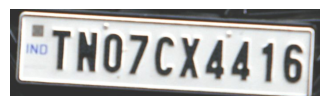

TN0ZCX4416
Gray ('TN07CX4416', None)
INOZCX4416
Gray_Gau ('IN07CX4416', None)
TN0ZCX4416
Gray_Bi ('TN07CX4416', None)
Thresh_Gau (None, None)
Thresh_Bi (None, None)
TNOZCY4SF6
Thresh_Gau_Kernel ('TN07CY45F6', None)
Thresh_Bi_Kernel (None, None)


In [31]:
read_image('download.jpg')

KA02MP9657
Object 1 text:
KA 02MP 9657



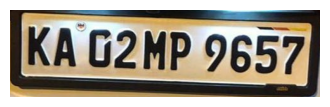

KA02MP9657
Gray ('KA02MP9657', None)
KAG2MP9657
Gray_Gau ('KA62MP9657', None)
KA02MP9657
Gray_Bi ('KA02MP9657', None)
KAGZMP9657
Thresh_Gau ('KA67MP9657', None)
KAG2MP9657
Thresh_Bi ('KA62MP9657', None)
KAG2MP9657
Thresh_Gau_Kernel ('KA62MP9657', None)
KAG2HP9657
Thresh_Bi_Kernel ('KA62HP9657', None)


In [32]:
read_image('download_3.jpg')

HR26DQ555
Object 1 text:
(~HR26dq555]



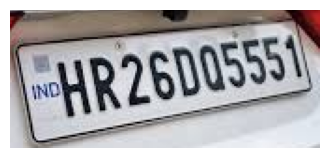

Gray (None, None)
HR2GDO5S5U
Gray_Gau (None, None)
HR26DO55518
Gray_Bi ('HR26DO5551', None)
Thresh_Gau (None, None)
HR26DO55ST
Thresh_Bi (None, None)
Thresh_Gau_Kernel (None, None)
HR26DO5SST
Thresh_Bi_Kernel (None, None)


In [33]:
read_image('download_4.jpg')

EHRZGFL2782
Object 1 text:
EHRZGFL2782



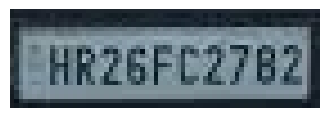

EHRZGFL2782
Gray (None, None)
Gray_Gau (None, None)
HRZGFL2782
Gray_Bi ('HR76FL2782', None)
Thresh_Gau (None, None)
Thresh_Bi (None, None)
Thresh_Gau_Kernel (None, None)
Thresh_Bi_Kernel (None, None)


In [34]:
read_image('download_5.jpg')

HB061
Object 1 text:
F | lIno | 5977 | HB 06 1



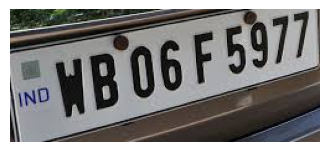

Gray (None, None)
Gray_Gau (None, None)
Gray_Bi (None, None)
Thresh_Gau (None, None)
Thresh_Bi (None, None)
Thresh_Gau_Kernel (None, None)
Thresh_Bi_Kernel (None, None)


In [35]:
read_image('download_6.jpg')